In [74]:
from sklearn import datasets, cluster, metrics
from sklearn.preprocessing import scale
from sklearn import decomposition
from plotly.subplots import make_subplots
from scipy.stats import mode
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time as time

# **DATASET: Digits**

In [75]:
digits_data = datasets.load_digits()
X_digits = scale(digits_data.data)
y_digits = digits_data.target
pca_digits = decomposition.PCA(n_components=0.95)
new_digits_data = pca_digits.fit(X_digits).transform(X_digits)
print (pca_digits.explained_variance_ratio_, sum(pca_digits.explained_variance_ratio_))

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582 0.00691911 0.00653909 0.00640793 0.00591384 0.00571162
 0.00523637 0.00481808 0.00453719 0.00423163] 0.9507791125066466


# **Explained variance**

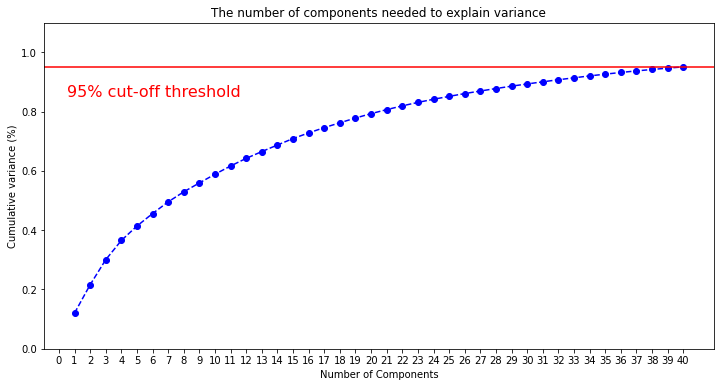

In [76]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, len(pca_digits.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca_digits.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(pca_digits.explained_variance_ratio_)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# **Reconstruction error**

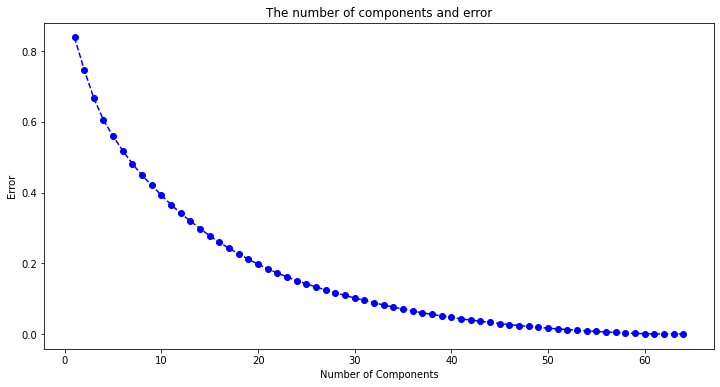

In [77]:
r = list(range(1,65))
loss = []
for i in r:
  pca = decomposition.PCA(n_components=i)
  l = pca.fit_transform(X_digits)
  m = pca.inverse_transform(l)
  loss.append(((X_digits - m)**2).mean())
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')  
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--digits**

In [78]:
digits_kmean = cluster.KMeans(n_clusters=10, max_iter=200)
digits_clusters = digits_kmean.fit_predict(new_digits_data)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.7106288258208124


# **EM--digits**

In [79]:
digits_EM = GaussianMixture(n_components=10, max_iter=200)
digits_clusters = digits_EM.fit_predict(new_digits_data)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.7340011129660545


# **NN--digits**

In [80]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       0.97      0.97      0.97        61
           2       0.98      1.00      0.99        58
           3       0.91      0.97      0.94        65
           4       1.00      0.96      0.98        54
           5       0.97      0.97      0.97        58
           6       0.98      0.94      0.96        63
           7       1.00      0.97      0.98        61
           8       0.88      0.95      0.91        62
           9       0.98      0.89      0.94        57

    accuracy                           0.96       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594

0.9612794612794613
--- 2.277662515640259 seconds ---


# **NN--digits--PCA**

In [81]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_digits_data, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.95      0.98      0.97        60
           2       0.98      0.97      0.98        65
           3       0.97      0.95      0.96        59
           4       1.00      1.00      1.00        63
           5       0.91      0.96      0.93        52
           6       1.00      1.00      1.00        66
           7       1.00      0.98      0.99        60
           8       0.95      0.96      0.96        57
           9       0.96      0.89      0.92        53

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

0.9713804713804713
--- 2.4171335697174072 seconds ---


# **NN--digits--clusters--data**

In [82]:
u = np.concatenate((X_digits, digits_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.96      0.98      0.97        65
           2       0.95      0.98      0.97        59
           3       0.93      0.96      0.95        55
           4       0.98      1.00      0.99        58
           5       1.00      0.95      0.97        59
           6       0.98      0.98      0.98        59
           7       1.00      1.00      1.00        52
           8       0.96      0.95      0.95        56
           9       0.97      0.94      0.96        71

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

0.9730639730639731
--- 2.1755454540252686 seconds ---


# **NN--digits--clusters**

In [83]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(digits_clusters.reshape(-1, 1), y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       0.57      0.28      0.38        60
           2       0.84      0.95      0.89        57
           3       0.41      0.82      0.55        57
           4       0.98      0.95      0.96        57
           5       0.38      0.87      0.53        62
           6       0.98      0.94      0.96        65
           7       0.91      0.95      0.93        66
           8       0.00      0.00      0.00        55
           9       0.00      0.00      0.00        59

    accuracy                           0.68       594
   macro avg       0.61      0.68      0.62       594
weighted avg       0.61      0.68      0.63       594

0.6835016835016835
--- 3.0415468215942383 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **DATASET: Wine**

In [84]:
wine_data = datasets.load_wine()
X_wine = scale(wine_data.data)
y_wine = wine_data.target
pca_wine = decomposition.PCA(n_components=0.95)
new_wine_data = pca_wine.fit(X_wine).transform(X_wine)
print (pca_wine.explained_variance_ratio_, sum(pca_wine.explained_variance_ratio_))

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019] 0.9616971684450641


# **Explained variance**

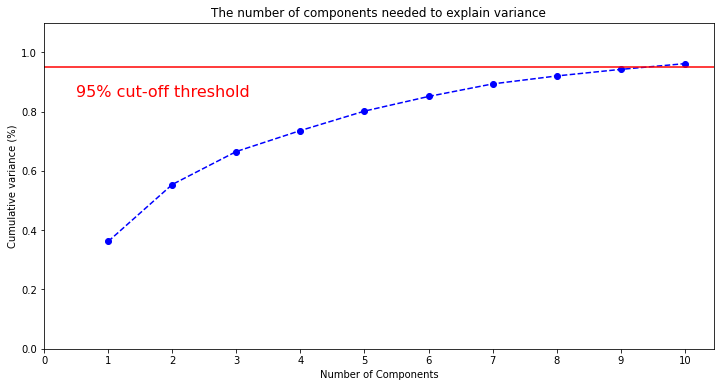

In [85]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, len(pca_wine.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca_wine.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(pca_wine.explained_variance_ratio_)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# **Reconstruction error**

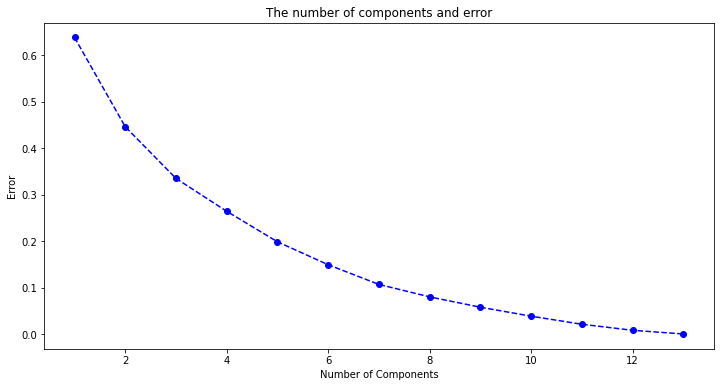

In [86]:
r = list(range(1,14))
loss = []
for i in r:
  pca = decomposition.PCA(n_components=i)
  l = pca.fit_transform(X_wine)
  m = pca.inverse_transform(l)
  loss.append(((X_wine - m)**2).mean())  
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--wine**

In [87]:
wine_kmean = cluster.KMeans(n_clusters=3, max_iter=200)
wine_clusters = wine_kmean.fit_predict(new_wine_data)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.9662921348314607


# **EM--wine**

In [88]:
wine_EM = GaussianMixture(n_components=3, max_iter=200)
wine_clusters = wine_EM.fit_predict(new_wine_data)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.9831460674157303


# **NN--wine**

In [89]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.93      0.96        29
           2       0.88      1.00      0.93        14

    accuracy                           0.97        59
   macro avg       0.96      0.98      0.97        59
weighted avg       0.97      0.97      0.97        59

0.9661016949152542
--- 0.22974491119384766 seconds ---


# **NN--wine--PCA**

In [90]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_wine_data, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        14

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

1.0
--- 0.2651188373565674 seconds ---


# **NN--wine--clusters--data**

In [91]:
u = np.concatenate((X_wine, wine_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        13

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

1.0
--- 0.17506790161132812 seconds ---


# **NN--wine--clusters**

In [92]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(wine_clusters.reshape(-1, 1), y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        19

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59

0.9830508474576272
--- 0.29747724533081055 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

